In [2]:
import pandas as pd
from pandas import DataFrame, Series
import datetime
import numpy as np
from statistics import stdev
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_excel("myAssetPool_final.xlsx", sheet_name = 'Adj_close', index_col=0)
High = pd.read_excel("myAssetPool_final.xlsx", sheet_name = 'High', index_col=0)
Low = pd.read_excel("myAssetPool_final.xlsx", sheet_name = 'Low', index_col=0)
Close = pd.read_excel("myAssetPool_final.xlsx", sheet_name = 'Close', index_col=0)

tickers = [tic for tic in Data]
Data.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2004-12-31,8.209394,14.334599,12.928661,13.204649,16.007933,13.221058,7.620145,31.567570,35.132927,23.976738,12.552827,8.017180,22.796925,18.937807,12.613128,12.714225,15.955993,20.041637,88.385559
2005-01-03,8.096329,13.960760,12.801544,13.128471,16.048155,13.164283,7.563420,31.394938,34.714676,23.648851,12.573286,7.905364,22.997406,18.841242,12.727464,12.706832,15.704612,19.919771,87.991096
2005-01-04,7.953772,13.361337,12.427669,12.766636,15.686164,12.901708,7.380638,30.679733,34.135559,23.001278,12.389185,7.771184,22.141087,18.481796,12.408527,12.307665,15.347388,19.554167,86.931953
2005-01-05,7.983264,13.245315,12.263162,12.476211,15.706274,12.908807,7.216763,30.840042,34.103386,23.157021,12.307363,7.916544,21.539658,18.379864,12.402509,12.307665,15.281234,19.565247,86.406013
2005-01-06,7.998014,13.129302,12.195864,12.490494,15.666056,12.915905,7.286095,30.815371,34.103386,22.771757,12.341455,8.061905,20.906729,18.465704,12.426581,12.322451,15.268003,19.554167,86.756622


In [4]:
len(tickers)

19

### 技術指標：乖離率(取30日)

In [5]:
bias_30_list = []

for tic in tickers:
    bias_30_pct = ((Data[tic] - Data[tic].rolling(30, min_periods = 1).mean()) / Data[tic].rolling(30, min_periods = 1).mean())*100
    bias_30_list.append(pd.Series(bias_30_pct.values, index = bias_30_pct.index))

# numbers in percentage
bias_frame = pd.DataFrame(bias_30_list).transpose()
bias_frame.columns = tickers
bias_frame = bias_frame.asfreq('BM')

In [6]:
bias_frame

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2004-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-31,2.206471,3.328244,-0.370915,2.140132,0.864186,-0.790476,0.144880,0.746442,-0.758639,5.288984,2.081795,1.429135,0.495926,1.827616,-1.734454,-0.281015,2.549445,0.381856,-0.062361
2005-02-28,3.994068,11.359647,4.218068,5.732337,4.256404,2.712311,2.787583,2.355572,1.779468,8.906925,5.093153,-0.204207,7.785639,2.507714,3.947202,5.116466,4.984809,3.180195,1.195636
2005-03-31,-3.854876,-4.183727,0.637078,-2.643112,-1.556571,-1.582230,-1.663150,0.496188,-2.620917,-3.984308,-2.536250,-2.592158,-5.710609,-2.765383,-2.687463,-2.470504,-3.344293,-1.863837,-1.274939
2005-04-29,-0.978043,-2.723162,-3.317008,0.957495,-2.949846,-2.985218,3.335914,-3.457066,-1.622007,-3.305704,-3.423021,-0.296727,-1.736384,-2.369014,-2.468628,-1.123557,-0.271873,-1.155308,-0.833440
2005-05-31,0.263369,4.843334,1.461219,0.003664,0.349661,0.670375,0.898744,-1.693724,-0.764863,2.268024,-0.882410,-0.289009,-4.428247,-1.227791,0.117739,-0.387168,2.325716,-1.078092,1.896633
2005-06-30,1.502260,3.665729,2.766864,3.253739,0.444285,-0.340826,2.492195,0.347650,-0.594743,-1.670571,1.635893,0.897451,1.938249,0.721683,-0.771219,-1.138104,0.110315,-0.066754,-0.659153
2005-07-29,1.514359,2.176156,2.663209,6.420998,3.221161,4.298982,4.066321,2.734513,0.231455,7.012247,1.183222,5.010996,4.968783,2.944282,2.966868,3.282885,-0.782961,0.482990,1.667172
2005-08-31,0.697078,6.080074,3.570841,-1.283443,0.224733,0.540024,-1.040636,0.834468,4.239467,-2.136630,0.428896,-2.668430,3.493385,0.217515,0.304943,0.590281,-3.948349,1.656461,-0.298690


### 技術指標：KD值

In [7]:
import talib

In [8]:
# 參數指標9日，平滑值3
def kd(df1, df2, df3):
    k_series = []
    for tic in tickers:
        kd = talib.STOCH(df1[tic].ffill().values, 
                 df2[tic].ffill().values, 
                 df3[tic].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)
        k_series.append(pd.Series(kd[0], index=df1.index))
    return k_series

In [9]:
kd_series = kd(High, Low, Close)
kd_list = [kd_series[i].values for i in range(len(kd_series))]
kd_frame = pd.DataFrame(kd_list).transpose()
kd_frame.columns = tickers
kd_frame.index = High.index
kd_frame = kd_frame.asfreq('BM')

kd_frame.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,81.912646,86.267454,58.846107,78.615581,76.651974,46.707349,73.509962,63.400328,38.361181,82.251995,86.116247,81.328910,81.303847,80.888902,30.842013,45.679004,61.933829,82.409850,40.474511
2005-02-28,75.204359,79.255165,70.972506,87.097069,88.358550,76.972106,79.520020,76.850227,68.665694,87.437551,81.272760,26.550330,83.442788,53.367407,84.942518,98.213972,71.676327,76.031809,69.737801
2005-03-31,13.958092,37.252297,39.289479,16.419269,20.782786,32.160228,33.374368,58.641259,16.178233,28.907891,27.893219,20.514708,28.243084,19.847756,44.990589,17.586822,41.140526,26.417439,37.671321
2005-04-29,65.296076,42.451087,29.926787,79.938698,24.522573,19.557701,85.072936,11.407340,71.890091,33.504930,21.592924,76.974469,39.064945,24.018883,19.279221,22.899014,72.633211,26.378894,55.125733


### 利用第一段資料區間估計報酬及共變異數
1. 利用技術指標得到每個月表現最好及最差的n檔ETF，並分別給予權重1/n / -1/n
2. 利用上述權重得下個月的估計報酬
3. 有兩種技術指標(兩個view)，分別做步驟1&2，可得P及Q
4. 最後利用每個月的估計報酬，計算其共變異數矩陣

In [10]:
ret_data_daily = Data.pct_change().dropna()
ret_data_daily.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,-0.013773,-0.026079,-0.009832,-0.005769,0.002513,-0.004294,-0.007444,-0.005469,-0.011905,-0.013675,0.001630,-0.013947,0.008794,-0.005099,0.009065,-0.000581,-0.015755,-0.006081,-0.004463
2005-01-04,-0.017608,-0.042936,-0.029206,-0.027561,-0.022557,-0.019946,-0.024167,-0.022781,-0.016682,-0.027383,-0.014642,-0.016973,-0.037235,-0.019078,-0.025059,-0.031414,-0.022746,-0.018354,-0.012037
2005-01-05,0.003708,-0.008683,-0.013237,-0.022749,0.001282,0.000550,-0.022203,0.005225,-0.000943,0.006771,-0.006604,0.018705,-0.027163,-0.005515,-0.000485,0.000000,-0.004310,0.000567,-0.006050
2005-01-06,0.001848,-0.008759,-0.005488,0.001145,-0.002561,0.000550,0.009607,-0.000800,0.000000,-0.016637,0.002770,0.018362,-0.029384,0.004670,0.001941,0.001201,-0.000866,-0.000566,0.004058
2005-01-07,-0.001229,0.013745,-0.002453,-0.008957,-0.002996,-0.006594,-0.010381,-0.010404,-0.005661,-0.002880,-0.011050,-0.013869,0.005342,-0.021499,-0.012107,-0.019196,-0.007799,0.001133,-0.001852


In [11]:
datelst = []
for date in ret_data_daily.index:
    d = date.strftime('%Y-%m')
    if d not in datelst:
        datelst.append(d)

ret = {}
for date in datelst:
    ret_monthly = ret_data_daily[date].mean()*len(ret_data_daily[date])
    ret[date] = ret_monthly

ret_data_monthly = DataFrame.from_dict(ret).T

In [12]:
ret_data_monthly.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01,0.008856,-0.027874,-0.045743,-0.022054,-0.014848,-0.047795,-0.046926,-0.017637,-0.029656,0.059577,0.000043,0.019125,-0.063777,-0.015173,-0.050266,-0.036755,-0.021710,-0.024101,-0.022235
2005-02,0.053595,0.153129,0.065155,0.065491,0.049550,0.040714,0.033939,0.028516,0.021168,0.104300,0.059452,0.004653,0.081509,0.029236,0.056628,0.061294,0.056090,0.051789,0.020999
2005-03,-0.043726,-0.090986,0.015408,-0.055860,-0.020407,-0.021352,-0.033327,-0.001235,-0.029201,-0.074475,-0.035294,-0.011463,-0.091928,-0.035285,-0.032854,-0.041655,-0.069775,-0.023930,-0.017798
2005-04,-0.005301,-0.036613,-0.062325,0.014816,-0.033389,-0.042926,0.047076,-0.050256,-0.021577,-0.028158,-0.043652,0.006933,-0.018256,-0.029127,-0.012278,-0.006578,-0.016662,-0.011207,-0.017184
2005-05,-0.004504,0.088519,0.028147,-0.011654,0.019699,0.022259,0.000589,-0.007623,-0.011973,0.043528,0.000777,0.011703,-0.032558,0.002699,0.017248,0.004291,0.042696,-0.007335,0.031357


In [13]:
def long_short_kd(order):
    k_index = kd_frame.transpose().index
    temp_dict_long = []
    temp_dict_short = []

    re_weights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    k = kd_frame.iloc[order]
    overbuy = k[(k>=90)]
    oversell = k[(k<=10)]
    k_range = k[(k<=90) & (k>=10)]

    lfirst = oversell.nsmallest(4).index.values
    if len(lfirst) != 0:
        temp_dict_long.extend(lfirst)

    lsecond = k_range.nlargest(4-len(lfirst)).index.values
    if len(lsecond) != 0:
        temp_dict_long.extend(lsecond)

    sfirst = overbuy.nlargest(4).index.values
    if len(sfirst) != 0:
        temp_dict_short.extend(sfirst)

    ssecond = k_range.nsmallest(4-len(sfirst)).index.values
    if len(ssecond) != 0:
        temp_dict_short.extend(ssecond)

    if len(temp_dict_long) > len(temp_dict_short):
        temp_dict_long = [temp_dict_long[i] for i in range(len(temp_dict_short))]
    if len(temp_dict_long) < len(temp_dict_short):
        temp_dict_short = [temp_dict_short[j] for j in range(len(temp_dict_long))]
   
    for index in temp_dict_long:
        re_weights[k_index.get_loc(index)] = 1/len(temp_dict_long)
    for index in temp_dict_short:
        re_weights[k_index.get_loc(index)] = -1/len(temp_dict_short)

    return np.array(re_weights)


def long_short_bias(order):
    bias_index = bias_frame.transpose().index
    temp_dict_long = []
    temp_dict_short = []
    bias = bias_frame.iloc[order]

    re_weights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    overbuy = bias[(bias>=3)]
    bias_over = bias[(bias>0.5) & (bias < 3)]
    long_range = bias[(bias>=0) & (bias<=0.5)]
    short_range = bias[(bias<0) & (bias>=-0.5)]
    bias_under = bias[(bias<-0.5) & (bias>-3)]
    oversell = bias[(bias<=-3)]

    lfirst = oversell.nsmallest(4).index.values
    if len(lfirst) != 0:
        temp_dict_long.extend(lfirst)

    lsecond = long_range.nlargest(4-len(lfirst)).index.values
    if len(lsecond) != 0:
        temp_dict_long.extend(lsecond)

    if len(temp_dict_long) != 4:
        lthird = bias_over.nlargest(4-len(temp_dict_long)).index.values
        if len(lthird) != 0:
            temp_dict_long.extend(lthird)

    sfirst = overbuy.nlargest(4).index.values
    if len(sfirst) != 0:
        temp_dict_short.extend(sfirst)

    ssecond = short_range.nsmallest(4-len(sfirst)).index.values
    if len(ssecond) != 0:
        temp_dict_short.extend(ssecond)

    
    if len(temp_dict_short) != 4:
        sthird = bias_under.nsmallest(4-len(temp_dict_short)).index.values
        if len(sthird) != 0:
            temp_dict_short.extend(sthird)
    
    # 調整long/short 檔數
    if len(temp_dict_long) > len(temp_dict_short):
        temp_dict_long = [temp_dict_long[i] for i in range(len(temp_dict_short))]
    if len(temp_dict_long) < len(temp_dict_short):
        temp_dict_short = [temp_dict_short[j] for j in range(len(temp_dict_long))]

    for index in temp_dict_long:
        re_weights[bias_index.get_loc(index)] = 1/len(temp_dict_long)
    for index in temp_dict_short:
        re_weights[bias_index.get_loc(index)] = -1/len(temp_dict_short)

    return np.array(re_weights)

In [14]:
estimated_ret_kd = []
estimated_ret_bias = []

for i in range(len(ret_data_monthly[:'2012-12'].index)):
    if i < len(ret_data_monthly[:'2012-12'].index) -1:
        kd_weights = long_short_kd(i+1)
        kd_est_ret = ret_data_monthly.loc[[ret_data_monthly.index[i+1]]].to_numpy()
        estimated_ret_kd.append((kd_weights*kd_est_ret).sum())
 
        bias_weights = long_short_bias(i+1)
        bias_est_ret = ret_data_monthly.loc[[ret_data_monthly.index[i+1]]].to_numpy()
        estimated_ret_bias.append((bias_weights*bias_est_ret).sum())

In [15]:
import math

estimated_ret_kd = [0 if math.isnan(x) else x for x in estimated_ret_kd]
estimated_ret_bias = [0 if math.isnan(x) else x for x in estimated_ret_bias]

In [16]:
view_ret = pd.DataFrame(np.array([estimated_ret_kd, estimated_ret_bias])).transpose()
view_ret.columns = ['kd_view', 'bias_view']
view_ret = view_ret.set_index(ret_data_monthly.index[1:96])

In [17]:
Q = np.array([sum(estimated_ret_kd) / len(estimated_ret_kd), sum(estimated_ret_bias) / len(estimated_ret_bias)])
omega = (view_ret.cov()).to_numpy()
omega_inv = np.linalg.pinv(omega)
Q = Q.reshape((2,1))
omega = omega.reshape((2,2))

In [18]:
print(Q)
print(omega)

[[-0.0015448 ]
 [ 0.00475865]]
[[ 0.00072655 -0.0002288 ]
 [-0.0002288   0.00111043]]


### 利用第一段得出的估計報酬計算第二段資料區間的調整權重
1. 帶有觀點的權重計算方式同第一段區間，預期報酬矩陣即上述求出的Q
2. 計算第二段區間每個月的調整權重(w*)
3. 利用步驟2的調整權重計算每個月的預期報酬

In [19]:
tau = 0.05 #given
gamma = 3.37 #given
neutral_weights = np.transpose(np.array([[0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.0239, 0.01081, 0.00598, 0.0751, 0.01466, 0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.0428, 0.61484]]))

In [20]:
adjust_ret = []
neutral_ret = []
monthly_rebal_weight = {}

for i in range(len(ret_data_monthly['2013-01':].index)): 
    
    neu_cov_matrix = Data[ret_data_monthly.index[i+96]].pct_change().cov() #利用每個月的報酬計算其變異數矩陣
    pi = gamma*(neu_cov_matrix.dot(neutral_weights))
    kd_weights_2 = long_short_kd(i+97)
    bias_weights_2 = long_short_bias(i+97)
    P = np.array([kd_weights_2, bias_weights_2])
    M_inverse = np.linalg.pinv((np.linalg.pinv(tau*neu_cov_matrix) + ((np.transpose(P)).dot(omega_inv)).dot(P)))
    adj_ret = M_inverse.dot((np.linalg.pinv(tau*neu_cov_matrix)).dot(pi) + ((np.transpose(P)).dot(omega_inv)).dot(Q))
    adj_sigma = neu_cov_matrix + np.linalg.pinv((np.linalg.pinv(tau*neu_cov_matrix) + ((np.transpose(P)).dot(omega_inv)).dot(P)))
    
    #調整權重
    rebal_weights = (1/gamma) * (np.linalg.pinv(adj_sigma)).dot(adj_ret)
    monthly_rebal_weight[ret_data_monthly.index[i+96]] = rebal_weights

    #調整後月報酬
    ret = (ret_data_monthly.iloc[i+96:i+97]).to_numpy()
    neu_ret = (ret.dot(neutral_weights)).reshape((1,))
    est_ret = (ret.dot(rebal_weights)).reshape((1,))
    adjust_ret.append(est_ret[0])   
    neutral_ret.append(neu_ret[0])

In [21]:
final_df = pd.DataFrame(adjust_ret)
final_df.columns = ['adj_ret']
final_df['neutral_ret'] = neutral_ret
final_df.index = ret_data_monthly['2013-01':'2019-12'].index

final_df.head()

,adj_ret,neutral_ret
2013-01,0.034555,0.041360
2013-02,-0.000878,0.002924
2013-03,0.020008,0.024106
2013-04,0.023323,0.028355
2013-05,-0.000876,0.002848


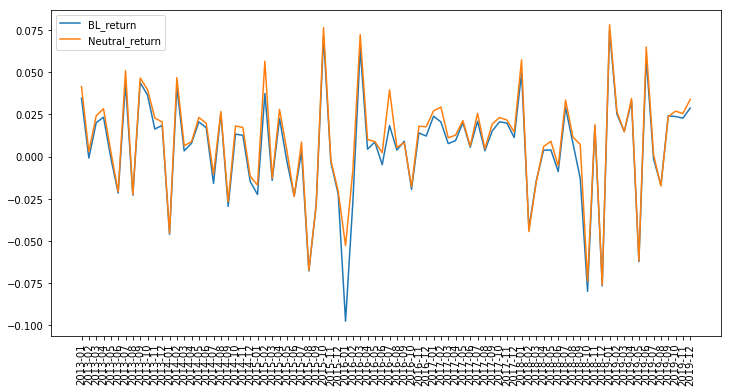

In [22]:
plt.figure(figsize = (12,6))
plt.plot(final_df.index, final_df['adj_ret'], label='BL_return')
plt.plot(final_df.index, final_df['neutral_ret'], label='Neutral_return')
plt.xticks(rotation = 90)
plt.legend()

plt.show()

### 報酬比較：Black Litterman vs. Neutral Portfolio

In [23]:
default = np.full((84,), np.nan)
final_df['Outperform'] = default

final_df.head()

,adj_ret,neutral_ret,Outperform
2013-01,0.034555,0.041360,NaN
2013-02,-0.000878,0.002924,NaN
2013-03,0.020008,0.024106,NaN
2013-04,0.023323,0.028355,NaN
2013-05,-0.000876,0.002848,NaN


In [24]:
for index, ret in final_df.iterrows():
    #print(final_df.loc[index:index,'Outperform'])
    if ret[0] - ret[1] >= 0:
        final_df.loc[index:index,'Outperform'] = 1
    else:
        final_df.loc[index:index,'Outperform'] = 0        

In [25]:
final_df.fillna(0, inplace=True)
final_df.head()

,adj_ret,neutral_ret,Outperform
2013-01,0.034555,0.041360,0.0
2013-02,-0.000878,0.002924,0.0
2013-03,0.020008,0.024106,0.0
2013-04,0.023323,0.028355,0.0
2013-05,-0.000876,0.002848,0.0


In [26]:
from statistics import stdev

bl_std = stdev(final_df['adj_ret'])*(np.sqrt(12))
ntrl_std = stdev(final_df['neutral_ret'])*(np.sqrt(12))
bl_mean = final_df['adj_ret'].mean()*12
ntrl_mean = final_df['neutral_ret'].mean()*12
bl_sharpe = bl_mean / bl_std
ntrl_sharpe = ntrl_mean / ntrl_std

print('black_std:', round(bl_std,4), 'ntrl_std:', round(ntrl_std,4))
print('black_mean:', round(bl_mean,4), 'ntrl_mean:', round(ntrl_mean,4))
print('black_sharpe:', round(bl_sharpe,4), 'ntrl_sharpe:', round(ntrl_sharpe,4))

black_std: 0.109 ntrl_std: 0.1085
black_mean: 0.0628 ntrl_mean: 0.1157
black_sharpe: 0.5762 ntrl_sharpe: 1.0662


In [27]:
final_df['Outperform'].sum()

8.0

In [28]:
rebal_w = [v.reshape(19,) for v in monthly_rebal_weight.values()]

BL_weights = DataFrame(data = rebal_w, columns = Data.columns, index = pd.period_range('2013/1', freq='M',periods=84))
BL_weights.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01,0.031681,0.005276,0.045006,0.047000,0.028514,0.005260,0.010295,0.008631,0.071524,0.031464,-0.006064,0.003010,0.018890,0.006400,-0.010140,0.017883,0.014667,0.037827,0.585562
2013-02,0.080495,-0.114690,0.058586,0.067874,0.017039,0.009653,0.033848,0.039000,0.091031,-0.006560,0.015018,-0.066934,0.044895,-0.002248,0.071685,-0.041558,-0.022793,0.120888,0.524220
2013-03,0.038206,0.002537,-0.016215,0.037838,0.000406,0.080113,0.069382,-0.013886,0.060765,0.034256,-0.014679,-0.011745,0.007656,0.029337,-0.031290,0.072090,-0.024079,0.047207,0.555064
2013-04,0.017114,0.001253,0.023481,0.051023,0.028514,0.026785,0.014319,-0.008895,0.056934,0.028552,0.026028,0.003010,0.004324,-0.008190,0.017928,0.029514,0.000077,0.055352,0.585562
2013-05,0.028359,0.022705,0.013168,0.050092,0.028514,0.022762,0.007203,0.005695,0.082769,0.013962,0.011438,-0.000083,0.018661,-0.007937,0.007362,0.015177,0.003422,0.043854,0.585562


In [29]:
BL_weights.to_excel('BL_weights.xlsx')